In [43]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv')

df.to_csv('./temp/day-33-data_science_job.csv', index=False)

In [45]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [46]:
df.isnull().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [47]:
# cols = []
# for col in df.columns:
#     perc = df[col].isnull().mean()
#     if 0.05 > perc > 0: cols.append(col)

cols = [col for col in df.columns if 0.05 > df[col].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [48]:
df[cols]

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64


<Axes: xlabel='education_level'>

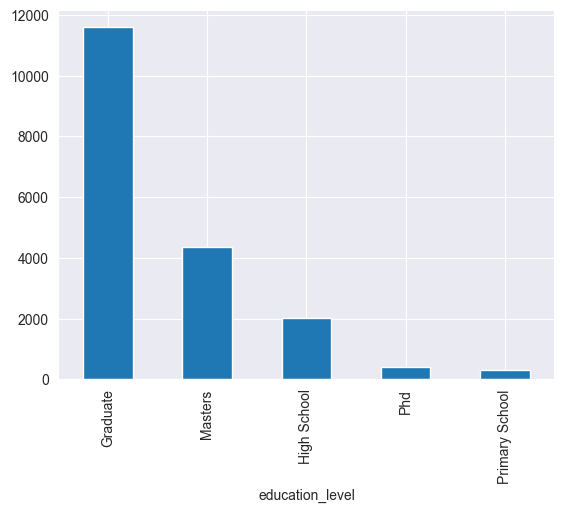

In [49]:
print(df['education_level'].value_counts())

df['education_level'].value_counts().plot(kind='bar')

In [50]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [51]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

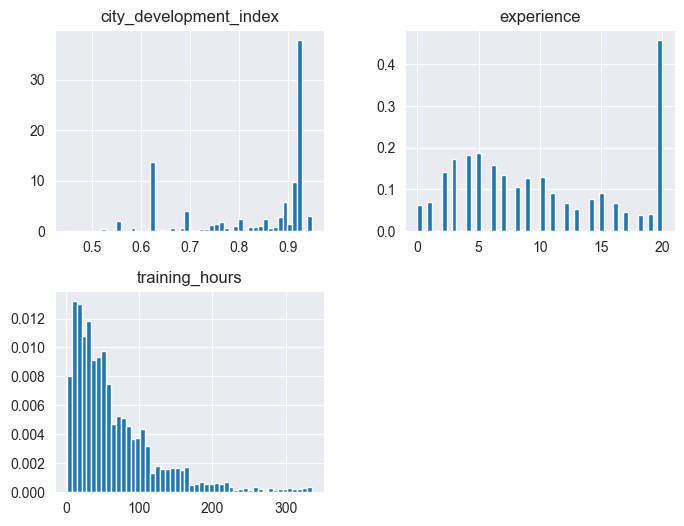

In [52]:
new_df.hist(bins=50, density=True, figsize=(8, 6))

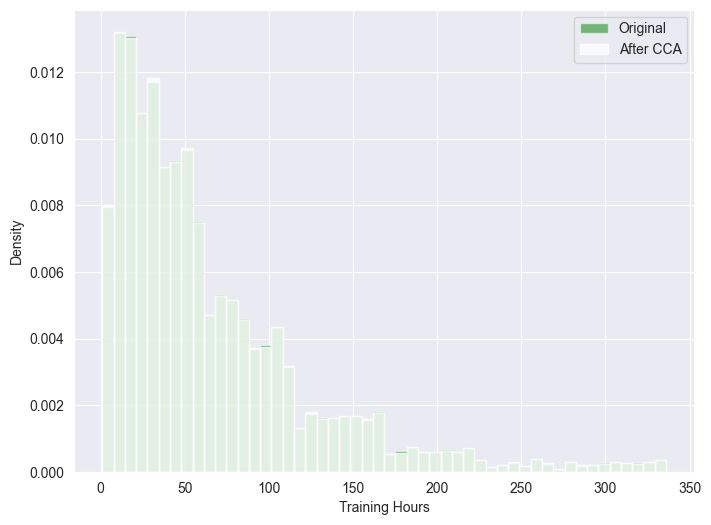

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].hist(bins=50, density=True, figsize=(8, 6), ax=ax, color='green', alpha=0.5, label='Original')

new_df['training_hours'].hist(bins=50, density=True, figsize=(8, 6), ax=ax, color='white', alpha=0.8, label='After CCA')

### extra info not necessary
# Set labels and legend
ax.set_xlabel('Training Hours')
ax.set_ylabel('Density')
ax.legend()

<Axes: ylabel='Density'>

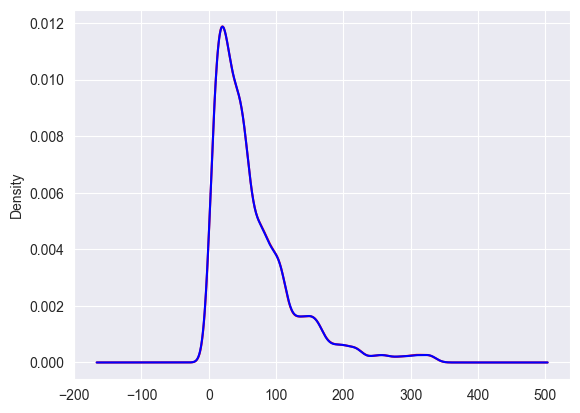

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='blue')

<Axes: >

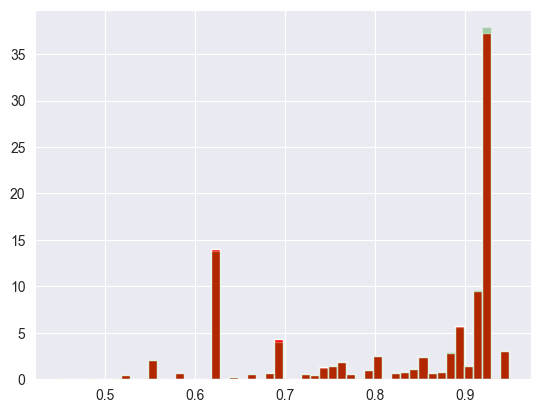

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.3)

<Axes: ylabel='Density'>

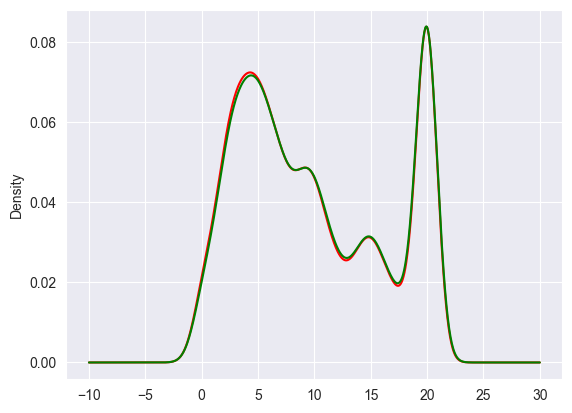

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [59]:
print("DF Len:", len(df))
print("----")
print("DF enrolled_university val_counts:", df['enrolled_university'].value_counts())
print("----")
df['enrolled_university'].value_counts() / len(df)

DF Len: 19158
----
DF enrolled_university val_counts: enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64
----


enrolled_university
no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
Name: count, dtype: float64